<a href="https://colab.research.google.com/github/SatriaImawan12/Uber-Rides-Analysis-in-2016/blob/main/Uber_Rides_Analysis_in_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Uber Rides Analysis**

The rise of ride-hailing services like Uber has revolutionized transportation, offering convenience and flexibility to users worldwide. This project delves into an analysis of Uber rides data from 2016, aiming to uncover patterns and insights into user behavior, ride characteristics, and potential business implications.

#**Import Library**



* Pandas:  This library helps to load the data frame in a 2D array format
and has multiple functions to perform analysis tasks in one go.
* Numpy: Numpy arrays are very fast and can perform large computations in a very short time.
* Matplotlib / Seaborn: This library is used to draw visualizations.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Load Data**

After importing all the libraries,  download the data using the [link](https://drive.google.com/file/d/1XuZ6dwQqeccatMuu6veh5miFjhdWh9I0/view).

Once downloaded, you can import the dataset using the pandas library.

In [27]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [28]:
dataset.shape

(1156, 7)

To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


#**Data Pre-Processing**

As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. You can try something else too.

In [30]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

In [31]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')

Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [32]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
							bins = [0,10,15,19,24],
							labels = ['Morning','Afternoon','Evening','Night'])

Once we are done with creating new columns, we can now check rows with null values.

In [33]:
dataset[dataset.isnull().any(axis=1)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
23,NaT,NaT,Business,Downtown,Gulfton,11.2,Meeting,NaN,NaN,NaN
24,NaT,NaT,Business,Gulfton,Downtown,11.8,Meeting,NaN,NaN,NaN
25,NaT,NaT,Business,Houston,Houston,21.9,Customer Visit,NaN,NaN,NaN
26,NaT,NaT,Business,Eagan Park,Jamestown Court,3.9,Errand/Supplies,NaN,NaN,NaN
27,NaT,NaT,Business,Morrisville,Cary,8.0,Errand/Supplies,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaN,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaN,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaN,NaN,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaN,NaN,NaN


In [34]:
dataset.dropna(inplace=True)

It is also important to check the duplicates rows from the dataset. To do that, refer the code below.

In [35]:
dataset.duplicated().sum()

0

In [36]:
dataset.drop_duplicates(inplace=True)

#**Data Visualization**

In this section, we will try to understand and compare all columns.

Let’s start with checking the unique values in dataset of the columns with object datatype.

In [37]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

##**Countplot CATEGORY and PURPOSE Columns**

Now, we will be using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180')])

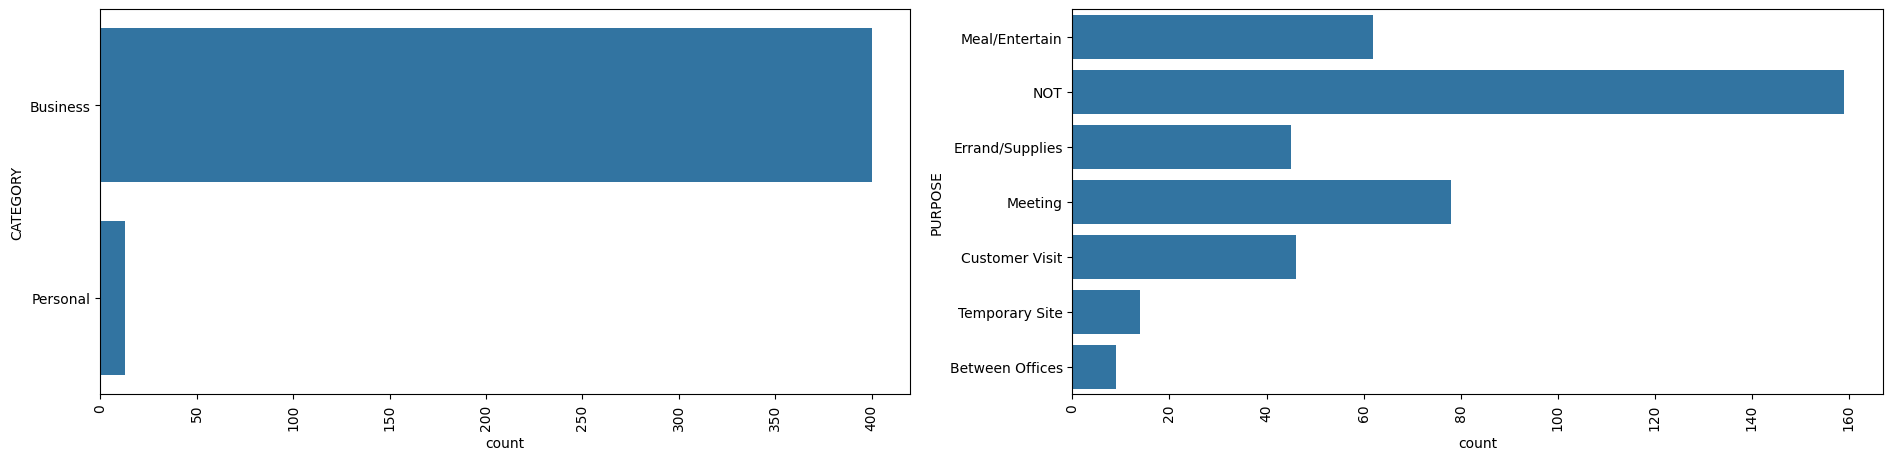

In [38]:
plt.figure(figsize=(23,5))

plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

##**Countplot TIME Columns**

Let’s do the same for time column, here we will be using the time column which we have extracted above.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

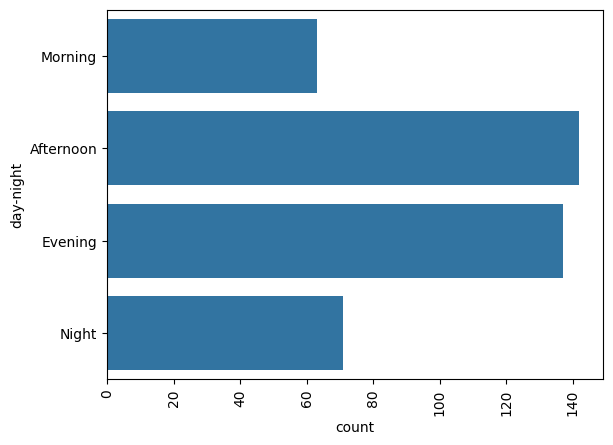

In [39]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

**Insights from the Above Count-Plots**

* Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

##**Countplot Two Different Categories Along with the PURPOSE of the User**

Now, we will be comparing the two different categories along with the PURPOSE of the user.

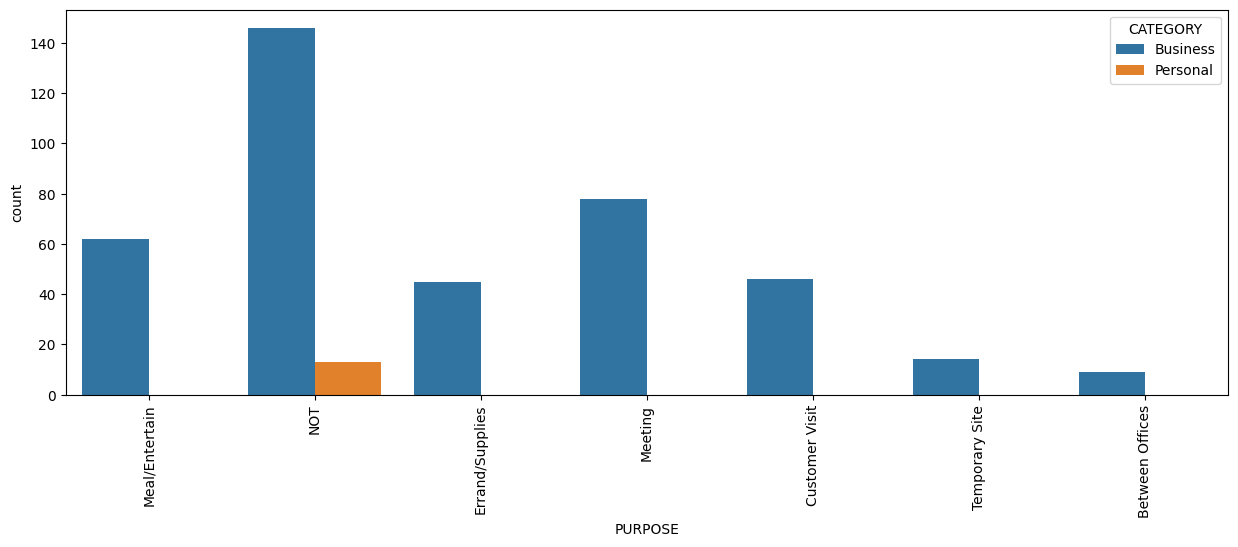

In [40]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

**Insights from the Above Count-Plots**

* Most of the rides are booked for business purpose.
* Most of the people book cabs for Meetings and Meal / Entertain purpose.


##**Correlation of CATEGORY and PURPOSE Column Values**

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [42]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


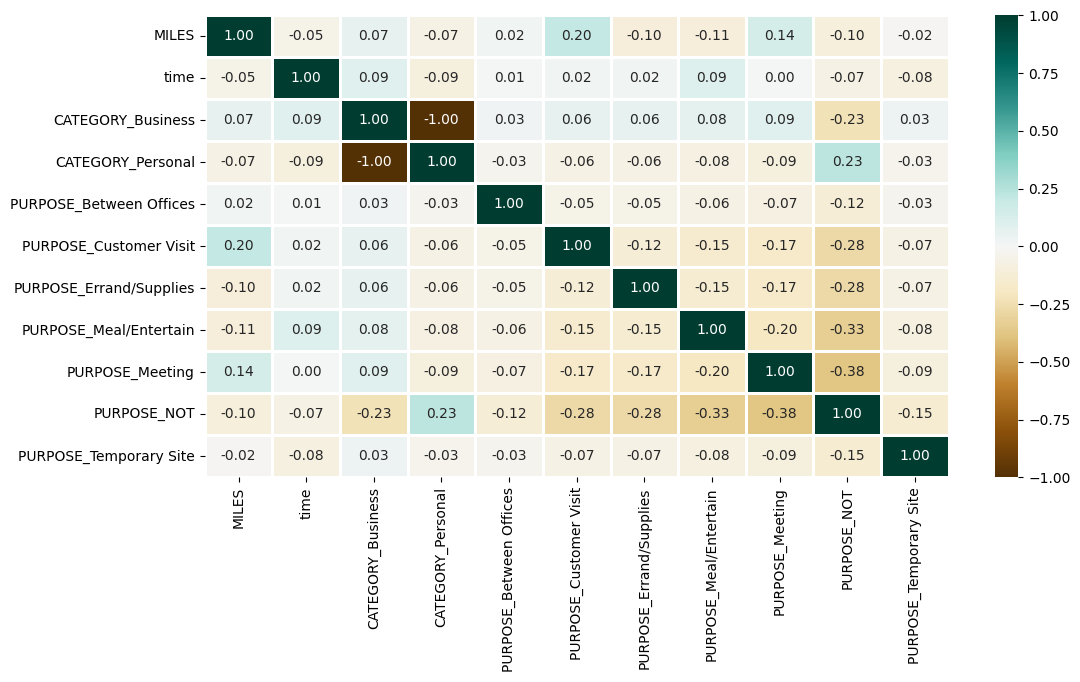

In [43]:
# Select only numeric columns for correlation
numeric_cols = dataset.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

**Insights from the Heatmap**
* Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
* There is not much correlation between the features.

##**Demand Analysis by Month**

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

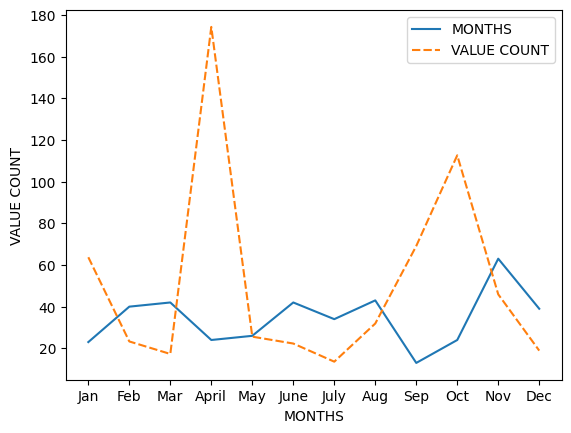

In [44]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
				"VALUE COUNT": dataset.groupby('MONTH',
												sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

**Insights from the above Plot**
* The counts are very irregular.
* Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that time winters are there in Florida, US.

##**Demand Analysis by Day**

In [45]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
	0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

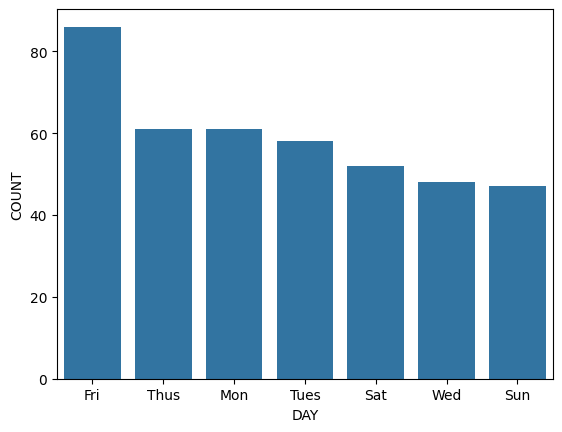

In [46]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

**Insight from Above Plots**

* Friday is the day with the most average Uber orders throughout the year, this may be because Friday is the last active day of work in a week for most people.

* Here companies can choose Friday when they want to do a promotion.

##**Analytics in the Miles Column**

<Axes: ylabel='MILES'>

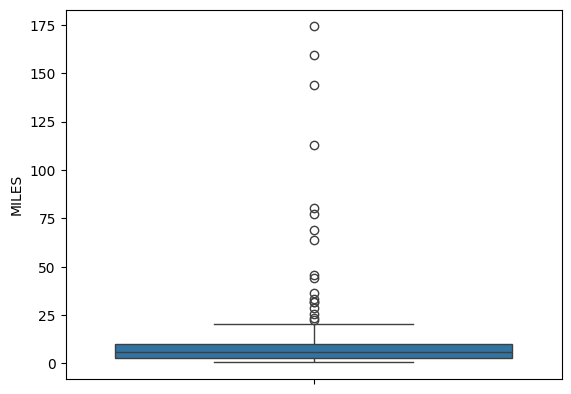

In [47]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

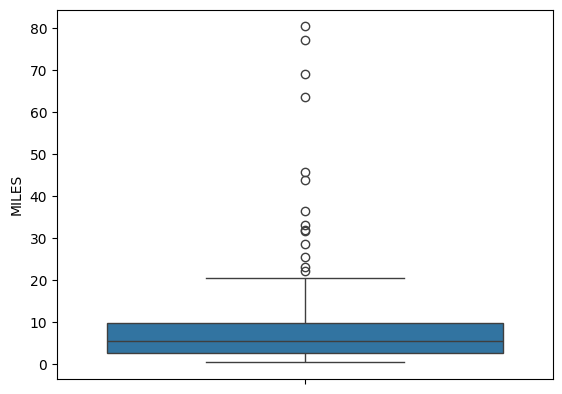

In [48]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-49-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

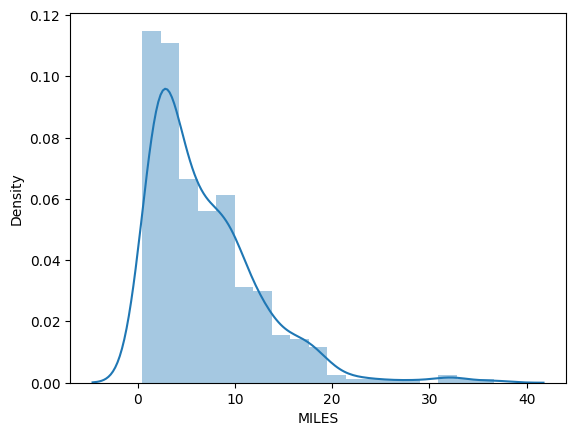

In [49]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

**Insights from the Above Plots**
* Most of the cabs booked for the distance of 4-5 miles.
* Majorly people chooses cabs for the distance of 0-20 miles.
* For distance more than 20 miles cab counts is nearly negligible.